<a href="https://colab.research.google.com/github/SanjayHoysala/SL-Recognition/blob/master/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
train = pd.read_csv("/content/drive/My Drive/SLDataset/sign_mnist_train.csv")
validation_set = pd.read_csv("/content/drive/My Drive/SLDataset/sign_mnist_test.csv")

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import random 
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline 
lbtrain = LabelBinarizer()
lbvalid = LabelBinarizer()

In [0]:
y = lbtrain.fit_transform(train['label'].values) 
y_validation = lbvalid.fit_transform(validation_set['label'].values) 

train.drop('label', axis=1, inplace=True) 
validation_set.drop('label', axis=1, inplace=True) 

x = train.values / 255 
x_validation = validation_set.values / 255

In [0]:
from sklearn.model_selection import train_test_split #To split the data into train test

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=8) 

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

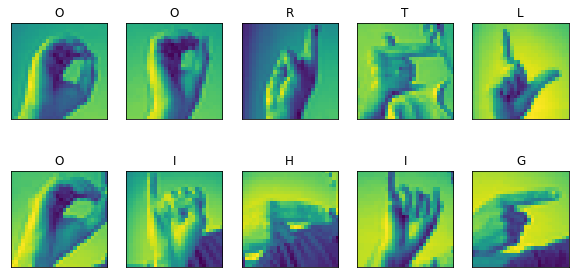

In [12]:
letters = "ABCDEFGHIKLMNOPQRSTUVWXY"
fig = plt.figure(figsize=(10,5))  
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])  
    ax.imshow(np.squeeze(x_train[i]))          
    ax.set_title("{}".format(letters[np.argmax(y_train[i])]))       
plt.show()

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

Using TensorFlow backend.


In [0]:
classes = 24
epochs = 5
batch_size = 100

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=4, activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=4, activation='relu', strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=4, activation='relu', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [19]:
import time
start = time.time()
history = model.fit(x_train, y_train, 
                   validation_data=(x_validation, y_validation),
                   epochs=epochs,
                   batch_size=batch_size)
training_time = time.time() - start
print("Time taken to train model: ", training_time)

Train on 17845 samples, validate on 7172 samples
Epoch 1/5
17845/17845 [==============================] - 43s 2ms/step - loss: 1.9645 - acc: 0.3911 - val_loss: 0.9525 - val_acc: 0.6916
Epoch 2/5
17845/17845 [==============================] - 43s 2ms/step - loss: 0.4852 - acc: 0.8322 - val_loss: 0.3936 - val_acc: 0.8855
Epoch 3/5
17845/17845 [==============================] - 43s 2ms/step - loss: 0.2151 - acc: 0.9249 - val_loss: 0.2786 - val_acc: 0.9057
Epoch 4/5
17845/17845 [==============================] - 43s 2ms/step - loss: 0.1153 - acc: 0.9603 - val_loss: 0.2108 - val_acc: 0.9296
Epoch 5/5
17845/17845 [==============================] - 43s 2ms/step - loss: 0.0916 - acc: 0.9691 - val_loss: 0.2356 - val_acc: 0.9296
Time taken to train model:  215.52047300338745


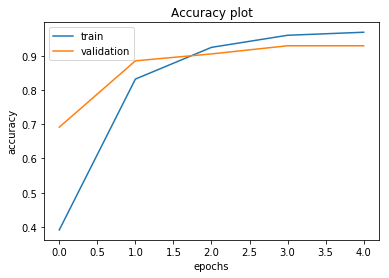

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
prediction = model.predict(x_test)
from sklearn.metrics import accuracy_score
print("Test Accuracy: " + str(accuracy_score(y_test,prediction.round())))

Test Accuracy: 0.9979188345473465
